# Model Fitting  
## Description

A model is fitted to the temperature and heating duty cycle data. The model has the following form:  
$$\frac{dT_{in}}{dt}=\frac{1}{RC}\Big[\big(T_{ext}-T_{in}\big)+\delta_{on}RK_{heat}]$$

### Inputs
1. Outside temperature, $T_{ext}$
2. Heating duty cycle $\delta_{on}$

### Parameters
1. Time constant $RC$
2. Heating power - thermal resistance product $RK$

### Outputs
1. Inside temperature $T$

## Filtering parameters
The data is first selected based on the following:
1. __interval amnt__: number of intervals to consider per building
2. __duration__: length of each interval
3. __heating_runtime_upper_bound__: maximum heating duty cycle over an interval
4. __heating_runtime_lower_bound__: minimum heating duty cycle over an interval
5. __indoor_variance_thershold__:  minimum variance in the indoor temperature over an interval
6. __cost_threshold__: maximum permissible value of the cost function
7. __initial_guess_model_fitting__: initial guesses for the parameters

## Example
### 1. Import required libraries

In [1]:
import matplotlib.pyplot as plt

from scripts.filters import months, hours, initial_guess_model_fitting, model_fitting_params
import scripts.preprocessing as pp
import scripts.model_fitting as mf

### 2. Load the data

Edit the filename to chang which building is being evaluated. The example buildings included in this repo can be found  in `data/raw_data/Toronto`. Note that the selected intervals are random so the results may not always be identical.

In [2]:
filename = "a937d992bbae47858967713080c8e8173b331e9c.csv"
df = pp.load_building_data(filename)

In [3]:
relevant_variables = ["Thermostat_Temperature", "T_out", "T_stp_heat", "auxHeat1", "auxHeat2", "auxHeat3"]
nice_labels = {
                "Thermostat_Temperature" : "Thermostat temperature",
                "T_out" : "Outside temperature",
                "T_stp_heat" : "Heating setpoint",
                "auxHeat1" : "Heating stage 1",
                "auxHeat2" : "Heating stage 2",
                "auxHeat3" : "Heating stage 3"
                }

### 3. Select the intervals and run the model fitting

In [4]:
intervals = []
while len(intervals) < 4:
    intervals = mf.select_intervals(months, hours, df, model_fitting_params)
solution = mf.fit_model(df, initial_guess_model_fitting, intervals)
p = solution.x
dt = 5.0

var_list =  mf.initialize_variables_for_fit(df, intervals)

results = mf.ode_solution_helper(var_list, dt, p)

### 4. Plot the results

/home/evan/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


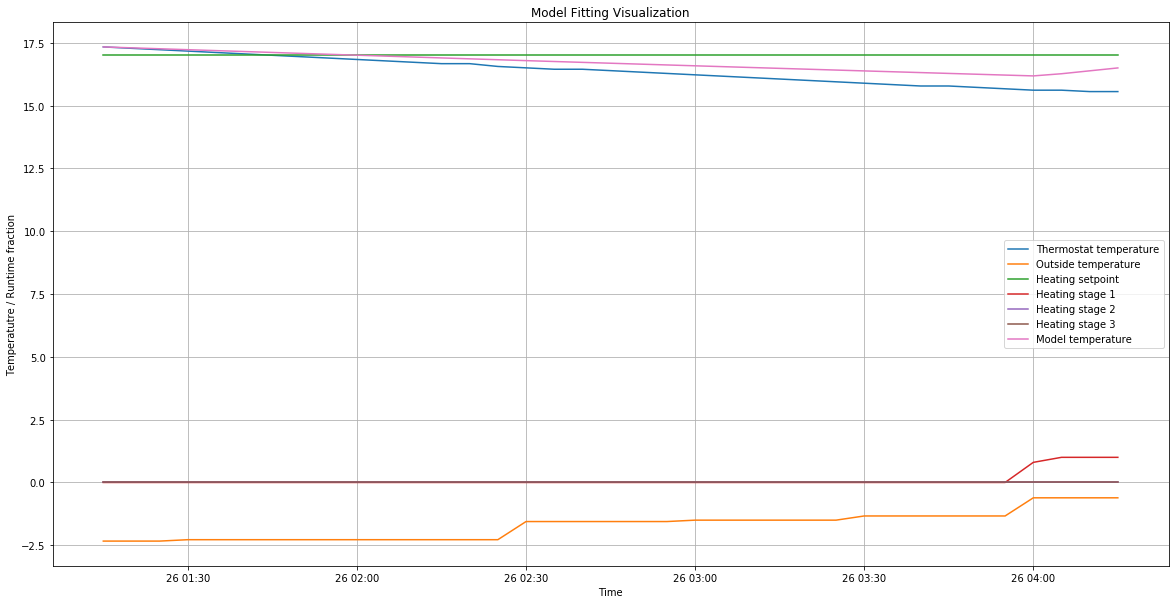

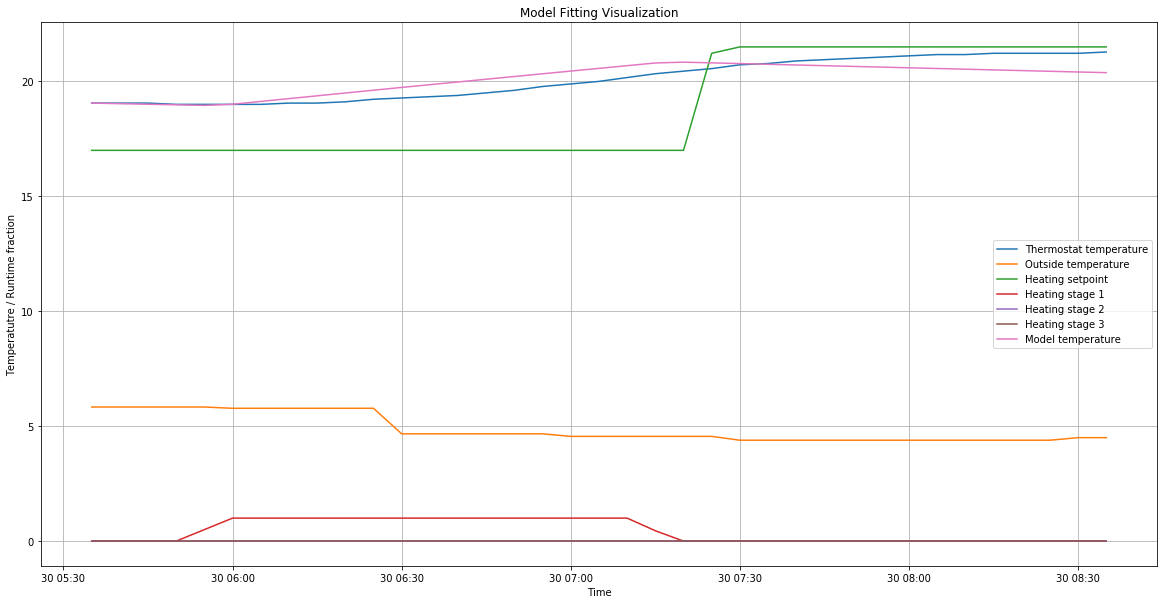

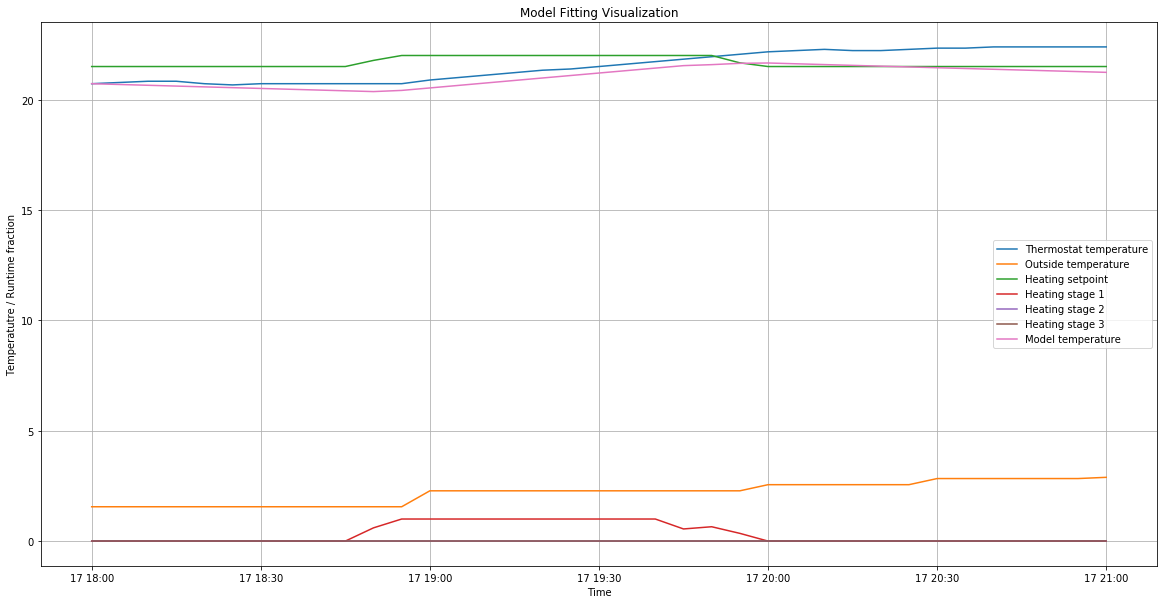

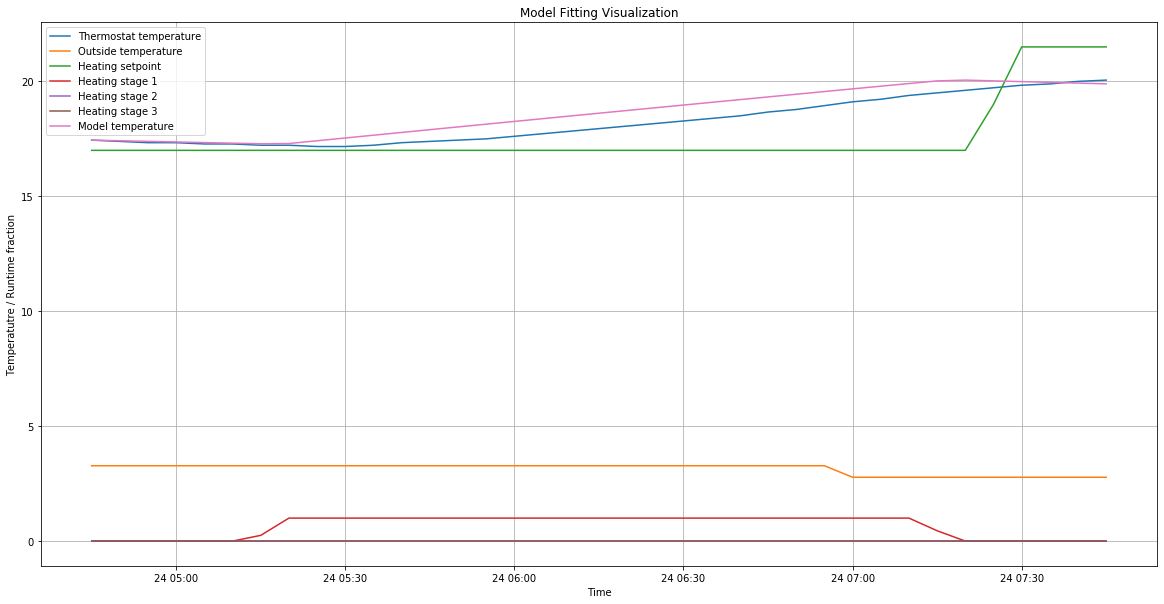

In [5]:
for i, result in zip(intervals, results):
    df_slice = df[i[0]:i[1]]
    plt.figure(figsize=(20,10))
    for variable in relevant_variables:
        plt.plot(df_slice.index, df_slice[variable], label = nice_labels.get(variable))

    plt.plot(df_slice.index, result, label = "Model temperature")
    plt.xlabel("Time")
    plt.ylabel("Temperatutre / Runtime fraction")
    plt.title("Model Fitting Visualization")
    plt.grid()
    plt.legend()